In [100]:
#dataframes
import pandas as pd

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import sys
sys.path.append("../")
import odor_stat_calculations as osc


#plots
import pylab as plt
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from figurefirst import FigureLayout,mpl_functions
import figurefirst
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc

import time
np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
FS=7


In [101]:
def load():
    layout = fifi.svg_to_axes.FigureLayout('../../Figure2/results_tracking.svg', autogenlayers=True, make_mplfigures=True, hide_layers=[])
    return layout
path="/home/vbl/DataAnalysis/data/simulator/figure/Figure_tracking/"


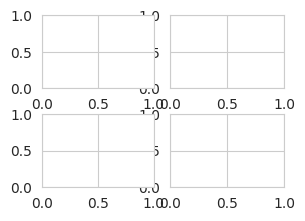

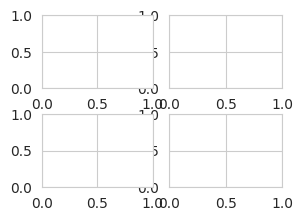

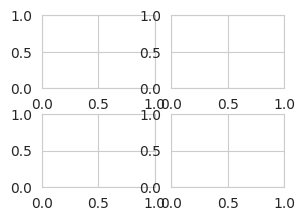

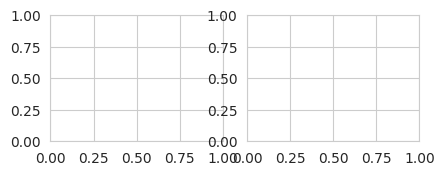

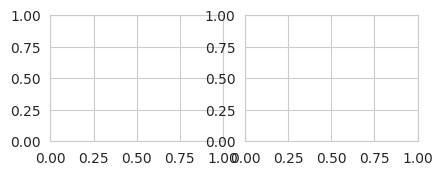

In [102]:
layout = load()

Trajectory 1

In [103]:
osdf = pd.read_hdf(str(path)+'os4.h5')
cfd_df = pd.read_hdf(str(path)+'cfd4.h5')

cosmos_time=pd.read_hdf(str(path)+'cosmos_bstrap_time.h5')
cfd_time=pd.read_hdf(str(path)+'cfd_bstrap_time.h5')

In [104]:
ax=layout.axes[('fig1','ax1')]
c_map = {"COSMOS": "#bc141a",   #  red
        "CFD":   "#1764ab",     #  blue
        "odor_markers": "black",
        "target": "purple"}  

ax.plot(cfd_df["x"], cfd_df["y"], c=c_map['CFD'], linewidth=2, rasterized=True)
whiff_idx_cfd = np.where(cfd_df["whiff"] == 1)[0]
if len(whiff_idx_cfd) > 0:
    ax.plot(cfd_df["x"].iloc[whiff_idx_cfd], cfd_df["y"].iloc[whiff_idx_cfd],'k*', label='Whiffs', markersize=2, rasterized=True)
    
ax.plot(cfd_df["x"].iloc[0], cfd_df["y"].iloc[0], 'go', markersize=5, label='Start',rasterized=True)
ax.plot(5, 4, 'x', color=c_map["target"], markersize=5, markeredgewidth=2, label='Target', rasterized=True)

# Annotate start point
ax.text(20.3,2.5, f'({cfd_df["x"].iloc[0]:.1f}, {cfd_df["y"].iloc[0]:.1f})', ha='right', va='bottom', color='green', rasterized=True)

# Annotate target point (5,4)
ax.text(5.5, 4.3, "(5,4)", fontsize=8, ha='left', va='top', color='purple',rasterized=True)



ax.set_rasterization_zorder(-20)

# ax.set_ylim(-40,50)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [105]:
ax=layout.axes[('fig1','ax2')]
c_map = {"COSMOS": "#bc141a",   #  red
        "CFD":   "#1764ab",     #  blue
        "odor_markers": "black",
        "target": "purple"}  

# 2) Left subplot: "mySim" trajectory
ax.plot(osdf["x"], osdf["y"], c=c_map['COSMOS'], linewidth=2, rasterized=True)


whiff_idx_osd = np.where(osdf["whiff"] == 1)[0]
if len(whiff_idx_osd) > 0:
    ax.plot(osdf["x"].iloc[whiff_idx_osd],  osdf["y"].iloc[whiff_idx_osd], 'k*', label='Whiffs', markersize=2,rasterized=True)

ax.plot(osdf["x"].iloc[0], osdf["y"].iloc[0], 'go', markersize=5, label='Start', rasterized=True)
ax.plot(5, 4, 'x', color=c_map["target"], markersize=5, markeredgewidth=2, label='Target', rasterized=True)

# Annotate start point
ax.text(20.3,2.3, f'({osdf["x"].iloc[0]:.1f}, {osdf["y"].iloc[0]:.1f})', ha='right', va='bottom', color='green',rasterized=True)

# Annotate target point (5,4)
ax.text(5.5, 4.3, "(5,4)", fontsize=8, ha='left', va='top', color='purple', rasterized=True)



ax.set_rasterization_zorder(-20)

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [106]:
ax=layout.axes[('fig1','ax3')]
lim=[5,11]

ax.plot(cfd_df.time, cfd_df.odor, c='#1764ab', rasterized=True)
ax.set_xlim(lim)

whiff_idx = np.where(cfd_df["whiff"] == 1)[0]
if len(whiff_idx)>0:
    ax.plot(cfd_df.time[whiff_idx], cfd_df.odor[whiff_idx], 'k*', markersize=2, label='Detected Whiffs', rasterized=True)

# ax.axhline(6.5,linestyle='--',c='black')

ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5,'bottom': 5}, 
                            smart_bounds=True,
                            xticks=lim,
                            yticks=[0,13],
                            linewidth=0.5)

ax.set_yticklabels(['0','10'])
ax.grid(False)
ax.set_xticklabels([])

ax.set_xlabel('6 seconds')
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('odor, a.u.')
ax.yaxis.set_label_coords(-0.08, 0.5)


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [107]:
ax=layout.axes[('fig1','ax4')]

ax.plot(osdf.time,osdf.odor, c='#bc141a', rasterized=True)
ax.set_xlim(lim)

whiff_idx = np.where(osdf["whiff"] == 1)[0]
if len(whiff_idx)>0:
    ax.plot(osdf.time[whiff_idx], osdf.odor[whiff_idx], 'k*', markersize=2, label='Detected Whiffs', rasterized=True)

# ax.axhline(6.5,linestyle='--',c='black')

ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['bottom'],
                            spine_locations={'left': 5,'bottom': 5}, 
                            smart_bounds=True,
                            xticks=lim,
                            yticks=[0,10],
                            linewidth=0.5)

ax.set_xticklabels([])
ax.grid(False)
# ax.set_xlabel('6 seconds')
ax.xaxis.set_label_coords(0.5, -0.15)


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

Trajectory 2

In [108]:
osdf = pd.read_hdf(str(path)+'os8.h5')
cfd_df = pd.read_hdf(str(path)+'cfd8.h5')
osdf.x[2178]=5
osdf.y[2178]=4
cfd_df.x[1801]=5
cfd_df.y[1801]=4


In [109]:
ax=layout.axes[('fig2','ax5')]
c_map = {"COSMOS": "#bc141a",   #  red
        "CFD":   "#1764ab",     #  blue
        "odor_markers": "black",
        "target": "purple"}  

ax.plot(cfd_df["x"], cfd_df["y"], c=c_map['CFD'], linewidth=2, rasterized=True)
whiff_idx_cfd = np.where(cfd_df["whiff"] == 1)[0]
if len(whiff_idx_cfd) > 0:
    ax.plot(cfd_df["x"].iloc[whiff_idx_cfd], cfd_df["y"].iloc[whiff_idx_cfd], 'k*', label='Whiffs', markersize=2, rasterized=True)

ax.plot(cfd_df["x"].iloc[0], cfd_df["y"].iloc[0], 'go', markersize=5, label='Start',rasterized=True)
ax.plot(5, 4, 'x', color=c_map["target"], markersize=5, markeredgewidth=2, label='Target', rasterized=True)

# Annotate start point
ax.text(7.2,3.85, f'({cfd_df["x"].iloc[0]:.1f}, {cfd_df["y"].iloc[0]:.1f})', ha='right', va='bottom', color='green', rasterized=True)

# Annotate target point (5,4)
ax.text(5.04, 4, "(5,4)", fontsize=8, ha='left', va='top', color='purple',rasterized=True)



ax.set_rasterization_zorder(-20)

# ax.set_ylim(-40,50)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [110]:
ax=layout.axes[('fig2','ax6')]
c_map = {"COSMOS": "#bc141a",   #  red
        "CFD":   "#1764ab",     #  blue
        "odor_markers": "black",
        "target": "purple"}  

# 2) Left subplot: "mySim" trajectory
ax.plot(osdf["x"], osdf["y"], c=c_map['COSMOS'], linewidth=2, rasterized=True)
whiff_idx_osd = np.where(osdf["whiff"] == 1)[0]
if len(whiff_idx_osd) > 0:
    ax.plot(osdf["x"].iloc[whiff_idx_osd],  osdf["y"].iloc[whiff_idx_osd], 'k*', label='Whiffs', markersize=2,rasterized=True)

ax.plot(osdf["x"].iloc[0], osdf["y"].iloc[0], 'go', markersize=5, label='Start', rasterized=True)
ax.plot(5, 4, 'x', color=c_map["target"], markersize=5, markeredgewidth=2, label='Target', rasterized=True)

# Annotate start point
ax.text(7.2,4.1, f'({osdf["x"].iloc[0]:.1f}, {osdf["y"].iloc[0]:.1f})', ha='right', va='bottom', color='green',rasterized=True)

# Annotate target point (5,4)
ax.text(5, 4.1, "(5,4)", fontsize=8, ha='left', va='top', color='purple', rasterized=True)



ax.set_rasterization_zorder(-20)

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [111]:
ax=layout.axes[('fig2','ax7')]
lim=[0,6]

ax.plot(cfd_df.time, cfd_df.odor, c='#1764ab', rasterized=True)
ax.set_xlim(lim)

whiff_idx = np.where(cfd_df["whiff"] == 1)[0]
if len(whiff_idx)>0:
    ax.plot(cfd_df.time[whiff_idx], cfd_df.odor[whiff_idx], 'k*', markersize=2, label='Detected Whiffs', rasterized=True)

ax.grid(False)
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5,'bottom': 5}, 
                            smart_bounds=True,
                            xticks=lim,
                            yticks=[0,15],
                            linewidth=0.5)

ax.spines['left'].set_visible(False)
ax.set_yticks([]) 
ax.set_xticklabels([])

# ax.set_xlabel('6 seconds')
ax.xaxis.set_label_coords(0.5, -0.15)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [112]:
ax=layout.axes[('fig2','ax8')]

ax.plot(osdf.time,osdf.odor, c='#bc141a', rasterized=True)
ax.set_xlim(lim)

whiff_idx = np.where(osdf["whiff"] == 1)[0]
if len(whiff_idx)>0:
    ax.plot(osdf.time[whiff_idx], osdf.odor[whiff_idx], 'k*', markersize=2, label='Detected Whiffs', rasterized=True)

ax.grid(False)
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['bottom'],
                            spine_locations={'left': 5,'bottom': 5}, 
                            smart_bounds=True,
                            xticks=lim,
                            yticks=[0,10],
                            linewidth=0.5)

ax.set_xticklabels([])
# ax.set_xlabel('6 seconds')
ax.xaxis.set_label_coords(0.5, -0.15)


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

Trajectory 3

In [113]:
osdf = pd.read_hdf(str(path)+'os1.h5')
cfd_df = pd.read_hdf(str(path)+'cfd1.h5')
# osdf.x[2506]=5
# osdf.y[2506]=4
# cfd_df.x[1801]=5
# cfd_df.y[1801]=4

In [114]:
ax=layout.axes[('fig3','ax9')]
c_map = {"COSMOS": "#bc141a",   #  red
        "CFD":   "#1764ab",     #  blue
        "odor_markers": "black",
        "target": "purple"}  

ax.plot(cfd_df["x"][:-1], cfd_df["y"][:-1], c=c_map['CFD'], linewidth=2, rasterized=True)

whiff_idx_cfd = np.where(cfd_df["whiff"] == 1)[0]
if len(whiff_idx_cfd) > 0:
    ax.plot(cfd_df["x"].iloc[whiff_idx_cfd], cfd_df["y"].iloc[whiff_idx_cfd], 'k*', label='Whiffs', markersize=2, rasterized=True)
    
ax.plot(cfd_df["x"].iloc[0], cfd_df["y"].iloc[0], 'go', markersize=5, label='Start',rasterized=True)
ax.plot(5, 4, 'x', color=c_map["target"], markersize=5, markeredgewidth=2, label='Target', rasterized=True)

# Annotate start point
ax.text(8.2,6.1, f'({cfd_df["x"].iloc[0]:.1f}, {cfd_df["y"].iloc[0]:.1f})', ha='right', va='bottom', color='green', rasterized=True)

# Annotate target point (5,4)
ax.text(5.2, 4.2, "(5,4)", fontsize=8, ha='left', va='top', color='purple',rasterized=True)



ax.set_rasterization_zorder(-20)

# ax.set_ylim(-40,50)
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [115]:
ax=layout.axes[('fig3','ax10')]
c_map = {"COSMOS": "#bc141a",   #  red
        "CFD":   "#1764ab",     #  blue
        "odor_markers": "black",
        "target": "purple"}  


# 2) Left subplot: "mySim" trajectory
ax.plot(osdf["x"][:-1], osdf["y"][:-1], c=c_map['COSMOS'], linewidth=2, rasterized=True)

whiff_idx_osd = np.where(osdf["whiff"] == 1)[0]
if len(whiff_idx_osd) > 0:
    ax.plot(osdf["x"].iloc[whiff_idx_osd],
            osdf["y"].iloc[whiff_idx_osd],
            'k*', label='Whiffs', markersize=2,rasterized=True)

ax.plot(osdf["x"].iloc[0], osdf["y"].iloc[0], 'go', markersize=5, label='Start', rasterized=True)
ax.plot(5, 4, 'x', color=c_map["target"], markersize=5, markeredgewidth=2, label='Target', rasterized=True)

# Annotate start point
ax.text(8.2, 6.1, f'({osdf["x"].iloc[0]:.1f}, {osdf["y"].iloc[0]:.1f})', ha='right', va='bottom', color='green',rasterized=True)

# Annotate target point (5,4)
ax.text(5.2, 4.2, "(5,4)", fontsize=8, ha='left', va='top', color='purple', rasterized=True)



ax.set_rasterization_zorder(-20)

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [116]:
ax=layout.axes[('fig3','ax11')]
lim=[0,6]

ax.plot(cfd_df.time, cfd_df.odor, c='#1764ab', rasterized=True)
ax.set_xlim(lim)

whiff_idx = np.where(cfd_df["whiff"] == 1)[0]
if len(whiff_idx)>0:
    ax.plot(cfd_df.time[whiff_idx], cfd_df.odor[whiff_idx], 'k*', markersize=2, label='Detected Whiffs', rasterized=True)

ax.grid(False)
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5,'bottom': 5}, 
                            smart_bounds=True,
                            xticks=lim,
                            yticks=[0,13],
                            linewidth=0.5)


ax.spines['left'].set_visible(False)
ax.set_yticks([]) 
ax.set_xticklabels([])
# ax.set_xlabel('6 seconds')
ax.xaxis.set_label_coords(0.5, -0.15)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [117]:
ax=layout.axes[('fig3','ax12')]

ax.plot(osdf.time,osdf.odor, c='#bc141a', rasterized=True)
ax.set_xlim(lim)

whiff_idx = np.where(osdf["whiff"] == 1)[0]
if len(whiff_idx)>0:
    ax.plot(osdf.time[whiff_idx], osdf.odor[whiff_idx], 'k*', markersize=2, label='Detected Whiffs', rasterized=True)

# ax.axhline(6.5,linestyle='--',c='black')

ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['bottom'],
                            spine_locations={'left': 5,'bottom': 5}, 
                            smart_bounds=True,
                            xticks=lim,
                            yticks=[0,10],
                            linewidth=0.5)

ax.set_xticklabels([])
ax.grid(False)
ax.xaxis.set_label_coords(0.5, -0.15)


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

### Cluster Analysis

feature_cols = [
        "vx", "vy", "speed", "acceleration",
        "heading_angle", "angular_velocity",
        "crosswind_dist", "upwind_dist",
        "dist_to_target", "time_since_whiff",
        "path_curvature"
    ]

Silhouette Score: 0.015;
Normalized Centroid Distance: 0.041

In [118]:
# combined_df = pd.read_hdf(str(path)+"tfresh_result_dataframe.h5")
X_umap = np.load(str(path)+"X_umap.npy")
labels = np.load(str(path)+"labels.npy",  allow_pickle=True)

In [119]:
ax=layout.axes[('fig4','ax13')]
colors = {
    "COSMOS": "#bc141a",  # red
    "CFD": "#1764ab"     # blue
}

# var_ratio = np.var(X_umap, axis=0)
# var_ratio = (var_ratio / np.sum(var_ratio)) * 100
# xlabel = f'U1 ({var_ratio[0]:.1f}% var)'
# ylabel = f'U2 ({var_ratio[1]:.1f}% var)'

mask_cfd = labels == 1
ax.scatter(X_umap[mask_cfd, 0], X_umap[mask_cfd, 1],  c=colors['CFD'], s = 4, alpha =0.5, label='CFD', rasterized=True)

# ax.set_title('COSMOS Trajectories')

ax.grid(False)
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5,'bottom': 5}, 
                            smart_bounds=True,
                            xticks=[10,20],
                            yticks=[-4,4],
                            linewidth=0.5)

ax.set_xlabel('U1')
ax.set_ylabel('U2')
ax.xaxis.set_label_coords(0.5, -0.15)
ax.yaxis.set_label_coords(-0.08, 0.5)


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [120]:
ax=layout.axes[('fig4','ax14')]

mask_cosmos = labels == 0
ax.scatter(X_umap[mask_cosmos, 0], X_umap[mask_cosmos, 1],  c=colors['COSMOS'], s=4, alpha =0.5, label='COSMOS', rasterized=True)

# ax.set_title('COSMOS Trajectories')

ax.grid(False)
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5,'bottom': 5}, 
                            smart_bounds=True,
                            xticks=[10,20],
                            yticks=[-4,4],
                            linewidth=0.5)

# ax.set_xlabel(xlabel)
# ax.set_ylabel(ylabel)
# ax.xaxis.set_label_coords(0.5, -0.15)
# ax.yaxis.set_label_coords(-0.08, 0.5)


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig4'], 'fig4', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [121]:
ax=layout.axes[('fig5','ax15')]
ax.scatter(X_umap[mask_cfd, 0], X_umap[mask_cfd, 1],  c=colors['CFD'], s = 4, alpha =0.5, label='CFD', rasterized=True)
ax.scatter(X_umap[mask_cosmos, 0], X_umap[mask_cosmos, 1],  c=colors['COSMOS'], s=4, alpha =0.5, label='COSMOS', rasterized=True)

# ax.set_title('COSMOS Trajectories')

ax.grid(False)
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5,'bottom': 5}, 
                            smart_bounds=True,
                            xticks=[10,20],
                            yticks=[-4,4],
                            linewidth=0.5)

# ax.set_xlabel(xlabel)
# ax.set_ylabel(ylabel)
# ax.xaxis.set_label_coords(0.5, -0.15)
# ax.yaxis.set_label_coords(-0.08, 0.5)


figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig5'], 'fig5', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')

In [122]:
ax=layout.axes[('fig5','ax16')]
# Assuming your data variables
stat_model_times = cosmos_time['cpu_time_s'].values[:-1]
cfd_model_times = cfd_time['cpu_time_s'].values[:-1]
# meanprops = {'linestyle': '-', 'linewidth': 2, 'meanline':True, 'marker': None}


boxplot = ax.boxplot( [cfd_model_times, stat_model_times ], labels=['CFD', 'COSMOS'], patch_artist=True, widths=0.6)
colors = [ '#1764ab', '#bc141a']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)  # Set transparency for boxes
    patch.set_rasterized(True) 

for element in boxplot.values():
    for artist in element:
        artist.set_rasterized(True)


ax.grid(False)
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 0,'bottom': 5}, 
                            smart_bounds=True,
                            xticks=[1,2],
                            yticks=[0,150],
                            linewidth=0.5)


ax.set_ylabel('CPU time, s', fontsize=12)
ax.xaxis.set_label_coords(0.5, -0.15)
ax.yaxis.set_label_coords(-0.06, 0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig5'], 'fig5', cleartarget=True)
layout.write_svg('../../Figure2/results_tracking.svg')